In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nengo
import scipy
import time
from NEF_RL import *
palette = sns.color_palette('tab10')
sns.set_palette(palette)
sns.set(context='paper', style='white', font="cmr10", font_scale=1.2)
plt.rcParams['axes.formatter.use_mathtext'] = True

In [26]:
def run_RL_carrabin(sid, trial, alpha, n_neurons=300):
    s = [alpha,alpha,alpha,alpha,alpha]
    seed_net = sid + 1000*trial
    columns = ['type', 'sid', 'trial', 'stage', 'alpha', 'measured alpha']
    dfs = []
    env = Environment(dataset='carrabin', sid=sid, trial=trial, decay='stages', s=s)
    net, sim = simulate_RL(env=env, n_neurons=n_neurons, seed_net=seed_net, z=0, a=5.5e-5, progress_bar=False)
    for stage in env.stages:
        told = int(((stage-1)*env.T)/env.dt)+2
        tnew = int((stage*env.T)/env.dt)-2
        eold = sim.data[net.probe_prediction][told][0]
        enew = sim.data[net.probe_prediction][tnew][0]
        delta_E = np.abs(enew - eold)
        color = env.empirical.query("stage==@stage")['color'].unique()[0]
        PE = np.abs(color - eold)
        measured_alpha = delta_E / PE
        # print(stage, color, eold, enew, PE, measured_alpha) 
        df = pd.DataFrame([['NEF_RL', sid, trial, stage, alpha, measured_alpha]], columns=columns)
        dfs.append(df)
    data = pd.concat(dfs, ignore_index=True)
    return data

In [38]:
empirical = pd.read_pickle(f"data/carrabin.pkl")
sids = empirical['sid'].unique()[:1]
trials = empirical['trial'].unique()[:20]
alpha = 0.3

start = time.time()
dfs = []
for sid in sids:
    for trial in trials:
        print(f"sid {sid}, trial {trial}")
        dfs.append(run_RL_carrabin(sid, trial, alpha=alpha))
alpha_data = pd.concat(dfs, ignore_index=True)
end = time.time()
print(f"runtime {(end-start)/60:.4} min")

sid 1, trial 1
sid 1, trial 2
sid 1, trial 3
sid 1, trial 4
sid 1, trial 5
sid 1, trial 6
sid 1, trial 7
sid 1, trial 8
sid 1, trial 9
sid 1, trial 10
sid 1, trial 11
sid 1, trial 12
sid 1, trial 13
sid 1, trial 14
sid 1, trial 15
sid 1, trial 16
sid 1, trial 17
sid 1, trial 18
sid 1, trial 19
sid 1, trial 20
runtime 2.708 min


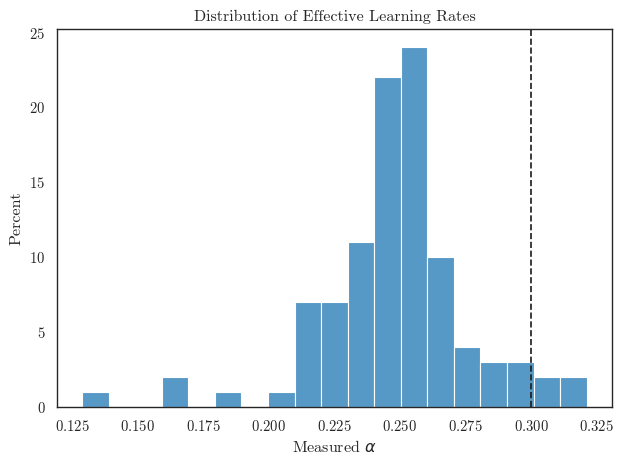

In [39]:
fig, ax = plt.subplots()
sns.histplot(alpha_data, x='measured alpha', color=palette[0], stat='percent')
ax.axvline(alpha, color='k', ls="--")
ax.set(xlabel=r"Measured $\alpha$", title='Distribution of Effective Learning Rates')
plt.tight_layout()
plt.show()
# fig.savefig("data/variance_learning_rate.jpg", dpi=600)

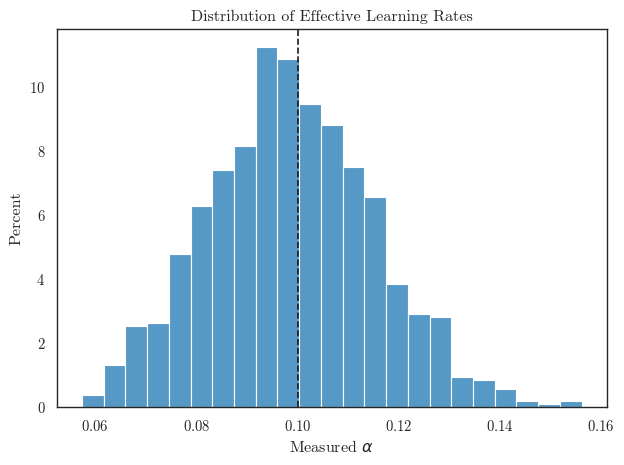

In [33]:
fig, ax = plt.subplots()
sns.histplot(alpha_data, x='measured alpha', color=palette[0], stat='percent')
ax.axvline(alpha, color='k', ls="--")
ax.set(xlabel=r"Measured $\alpha$", title='Distribution of Effective Learning Rates')
plt.tight_layout()
plt.show()
# fig.savefig("plots/variance_learning_rate.jpg", dpi=600)

In [37]:
pd.read_pickle("data/RL_jan27_params.pkl")['alpha'].max()

0.32703222156369044